In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [114]:
df = sns.load_dataset('penguins')

# Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [115]:
df[['species', 'body_mass_g']].groupby('species').mean()

,body_mass_g
species,
Adelie,3700.662252
Chinstrap,3733.088235
Gentoo,5076.016260


Hay 3 tipos de especies, Adelie, Chinstrap y Gentoo.

Para todos las especies se dan la carácterística de, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex.

2. ¿Hay valores faltantes en las variables? Determine una estrategia de limpieza y apliquela.

Sí, hay valores faltantes, esto se puede observar aplicando:

In [116]:
df.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


Es que quiere decir que hay 2 valores faltantes para bill_length_mm, 2 para bill_depth_mm, 2 para flipper_length_mm, 2 para body_mass_g y 11 para sex.

Para limpiar los datos primero se trata quitando los valores desconocidos para alguna de las columnas, por ejemplo `bill_length_mm` y luego se observa qué valores desconocidos quedan para las otras filas aplicando los métodos `.isna()` y `.sum()`

In [117]:
penguins = df[df['bill_length_mm'].notna()]

In [118]:
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,9


De esto se ve que solo hay datos desconocidos para la columna `sex`, por lo tanto se aplica la máscara para filtrar los datos desconocidos del data frame.

In [119]:
penguins = penguins[penguins['sex'].notna()]

Por último, se verifica que no hayan datos desconocidos:

In [120]:
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en el número de pinguinos por isla?

In [121]:
penguins.groupby('island').count()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,163,163,163,163,163,163
Dream,123,123,123,123,123,123
Torgersen,47,47,47,47,47,47


Se observa que la isla con mayor número de pingüinos es **Biscoe**.

Parece que hay un desbalance en el número de pinguinnos en la isla **Torgersen**, ya que esta tiene un número mucho menor a las otras dos islas.

4. Repita la pregunta anterior observando las especies.

In [122]:
penguins.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,146,146,146,146,146,146
Chinstrap,68,68,68,68,68,68
Gentoo,119,119,119,119,119,119


La especie con mayor número de pinguinos por isla es la **Adelie**, donde hay un desbalance con la especie **Chinstrap** ya que esta especie tiene un número menor de pinguinos por isla comparado a las otras dos especies.

# Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

In [123]:
penguins.groupby('species')['bill_length_mm'].agg(['mean', 'std'])

,mean,std
species,,
Adelie,38.823973,2.662597
Chinstrap,48.833824,3.339256
Gentoo,47.568067,3.106116


6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [124]:
penguins.groupby('species')['bill_length_mm'].max()

,bill_length_mm
species,
Adelie,46.0
Chinstrap,58.0
Gentoo,59.6


El pingüino con el pico más largo es el **Gentoo** con $59.6\ \text{mm}$.

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

In [125]:
penguins.groupby('species')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


8. Describa la distribucion con ayuda de la media, desviacion estandar.

Los pingüinos más pesados son los **Gentoo**, le siguien el **Chiinstrap** y el **Adelie**, esto según la media, lo que quiere decir que la distribución más a la derecha sería la del **Gentoo** y la más a la izquierda la del **Adelie**. La desviación estandar indica qué tan ancha es la distribución, asumiendo que es gaussiana, en este caso la distribución más ancha es la del **Gentoo** y la más angosta la del **Chainstrap**.

9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [126]:
pesos = penguins.groupby('sex')['body_mass_g'].agg(['mean', 'std'])

In [127]:
machos = pesos.loc['Male']
hembras = pesos.loc['Female']

machos - hembras

,0
mean,683.411797
std,121.456835


Se observa que los machos en general son más pesados que las hembras.

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [128]:
penguins.groupby('species')['flipper_length_mm'].agg(['mean', 'std'])

,mean,std
species,,
Adelie,190.102740,6.521825
Chinstrap,195.823529,7.131894
Gentoo,217.235294,6.585431


11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [129]:
penguins.groupby('species')['flipper_length_mm'].agg(['min', 'max'])

,min,max
species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [130]:
penguins.groupby(['species', 'island'])['bill_length_mm'].mean()

species    island   
Adelie     Biscoe       38.975000
           Dream        38.520000
           Torgersen    39.038298
Chinstrap  Dream        48.833824
Gentoo     Biscoe       47.568067
Name: bill_length_mm, dtype: float64

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [131]:
penguins.groupby(['island', 'species'])['bill_length_mm'].std()

island     species  
Biscoe     Adelie       2.480916
           Gentoo       3.106116
Dream      Adelie       2.484276
           Chinstrap    3.339256
Torgersen  Adelie       3.028097
Name: bill_length_mm, dtype: float64

Se puede observar que la isla con mayor variación en la longitud del pico es la isla **Dream** entre los pinguinos **Adelie** y **Chinstrap**, la diferencia eentre la desviación estandar en esta isla es la más grande.

# Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

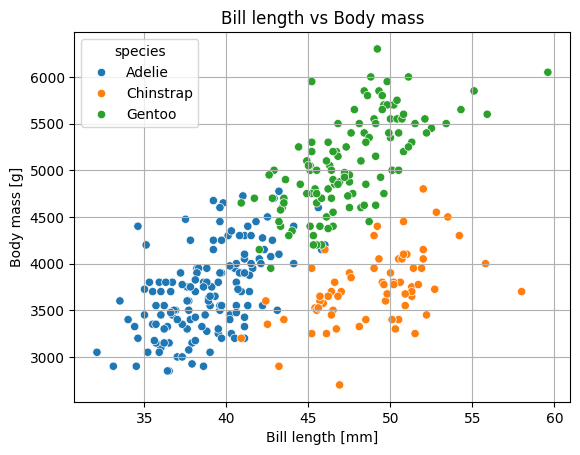

In [132]:
fig, ax = plt.subplots()
sns.scatterplot(x='bill_length_mm', y='body_mass_g', hue='species', data=penguins, ax=ax)
plt.title('Bill length vs Body mass')
plt.ylabel('Body mass [g]')
plt.xlabel('Bill length [mm]')
plt.grid()
plt.show()

Se puede observar en la gráfica que tanto en general, como para cada especie en específico, la relación entre el largo del pico y la masa del pingüino tiene una tendencia lineal.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

Según la anterior gráfica parece ser que las especies que tienen mayor correlación entre la longitud del pico y la masa son las especies **Gentoo** y **Adelie**, ya que estas juntas parecen seguir una tendencia uniforme, mientras que en la especie **Chinstrap** se observa que los datos se desvían bastante de la tendencía de las otras dos especies.

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

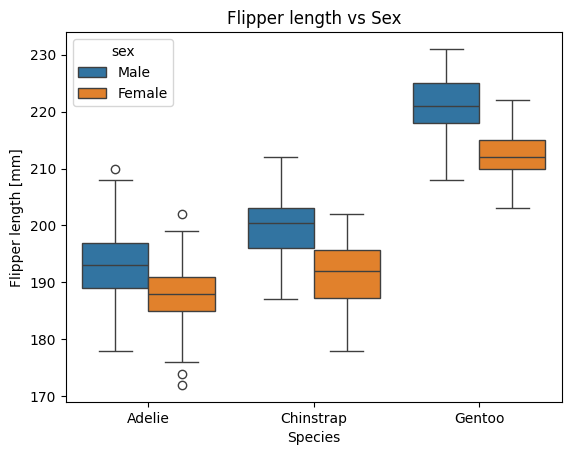

In [133]:
fig, ax = plt.subplots()
sns.boxplot(x='species', y='flipper_length_mm', hue='sex', data=penguins, ax=ax)
plt.title('Flipper length vs Sex')
plt.ylabel('Flipper length [mm]')
plt.xlabel('Species')
plt.show()

De la gráfica se observa que generalmente en todas las especies la longitud de la aleta en los machos es mayor que en las hembras.

# Test de hipótesis

Se quiere probar si hay correlación entre la longitud del pico y la masa corporal de los pingüinos de la raza **Adelie**.

**Hipótesis nula:** hay correlación entre la longitud del pico y la masa corporal de los pingüinos.

**Hipótesis alternativa:** no hay correlación entre dichas variables.

Los datos son:

In [134]:
X = penguins[penguins['species'] == 'Adelie']['bill_length_mm'].values
Y = penguins[penguins['species'] == 'Adelie']['body_mass_g'].values

Se hace uso de la función del estimador de la correlación de Pearson mostrada en clase:

In [135]:
def pearson_correlation(X, Y):
    """
    Calcula el coeficiente de correlación de Pearson entre dos listas o arrays de datos X e Y.

    Parámetros:
    X -- Lista o array de valores de la variable X.
    Y -- Lista o array de valores de la variable Y.

    Retorna:
    r -- Coeficiente de correlación de Pearson.
    """
    n = len(X)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    sum_XY = np.sum(X * Y)
    numerador = sum_XY - n * mean_X * mean_Y

    # Desviaciones estándar muestrales (n-1 en el denominador)
    std_X = np.std(X, ddof=1)  # ddof=1 para obtener S_x
    std_Y = np.std(Y, ddof=1)  # ddof=1 para obtener S_y

    denominador = (n - 1) * std_X * std_Y
    r = numerador / denominador
    return r

Se calcula el coeficiende de correlación de Pearson:

In [136]:
r = pearson_correlation(X, Y)
print(f'El coeficiente de correlación lineal es: {round(r, 3)}')

El coeficiente de correlación lineal es: 0.544


Ahora se hace uso de la función de distribución t-student: $$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$ donde $r$ es el coeficiente de correlación lineal y $n$ son los grados de libertad.

El valor de $n$ es la cantidad de datos que se tienen, en este caso es la cantidad de pinguinos de raza **Adelie** a la que se le tomaron los datos, esto es:

In [137]:
n = len(X)

Luego escogiendo un valor $\alpha = 0.05$, se tiene que el p-value es:

In [138]:
alpha = 0.05
p = 1 - alpha

Con todos estos parámetros, se procede a calcular el estimador usando la función de distribución t-student:

In [139]:
t = (r*np.sqrt(n-2))/(np.sqrt(1-r**2))

Ahora se procede a calcular el innternvalo de predicción:

In [140]:
intervalo = stats.t.interval(p, n-2, loc=0, scale=1)

In [141]:
print(f'El estimador es: {round(t, 3)}')
print(f'El intervalo de predicción es: [{round(intervalo[0], 4)} , {round(intervalo[1], 4)}]')

El estimador es: 7.786
El intervalo de predicción es: [-1.9766 , 1.9766]


Entonces, se observa que el timador está fuera del intervalo de predicción, lo que indica que se debe rechazar la hipótesis nula, por lo tanto se concluye que no hay correlación entre la longitud del pico y la masa corporal de los pingüios **Adelie**.